In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [36]:
data_df=pd.read_csv("data/diabetes.csv")
clean_data_df = data_df[
    (data_df['Glucose'] != 0) &
    (data_df['BloodPressure'] != 0) &
    (data_df['SkinThickness'] != 0) &
    (data_df['Insulin'] != 0) &
    (data_df['BMI'] != 0)
]

In [37]:
glucose = ctrl.Antecedent(np.arange(56, 198+1, 1), 'glucose')
age = ctrl.Antecedent(np.arange(21, 81+1, 1), 'age')

prediction = ctrl.Consequent(np.arange(0, 1+0.05, 0.05), 'prediction')

# glucose
glucose['very low'] = fuzz.trapmf(glucose.universe, [0, 53, 69.5, 97.5])
glucose['low'] = fuzz.trapmf(glucose.universe, [56, 70.5, 97, 125.5])
glucose['medium'] = fuzz.trapmf(glucose.universe, [70, 98, 124.5, 162.5])
glucose['high'] = fuzz.trapmf(glucose.universe, [97.5, 125.5, 162, 200])
glucose['very high'] = fuzz.trapmf(glucose.universe, [124.5, 163, 200, 300])

# age
age['young'] = fuzz.trapmf(age.universe, [0, 18, 22, 33])
age['middle age'] = fuzz.trimf(age.universe, [21, 33, 44])
age['old'] = fuzz.trimf(age.universe, [33, 47, 67])
age['very old'] = fuzz.trapmf(age.universe, [47, 51, 82, 100])

# output
prediction['no'] = fuzz.trimf(prediction.universe, [0, 0, 0.8])
prediction['yes'] = fuzz.trimf(prediction.universe, [0.2, 1, 1])


/home/ting/Dev-Projects/Fuzzy-Logic-Diabetes/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


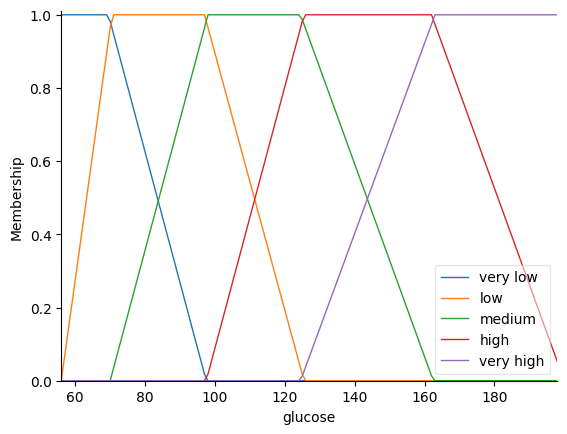

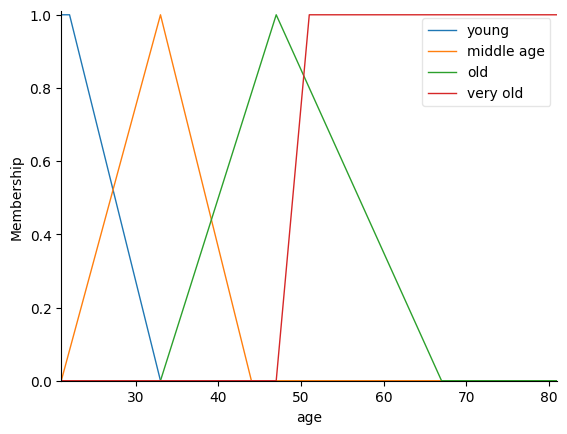

In [38]:
glucose.view()
age.view()

In [39]:
rules = [
    # glucose, age, no
    ctrl.Rule(glucose['very low'] &
              (age['young'] | age['middle age'] | age['old']),
              prediction['no']),
    ctrl.Rule(glucose['low'] &
              (age['young'] | age['middle age']),
              prediction['no']),
    ctrl.Rule(glucose['medium'] &
              (age['young'] | age['middle age']),
              prediction['no']),
    ctrl.Rule(glucose['high'] &
              age['young'],
              prediction['no']),

    # glucose, age, yes
    ctrl.Rule(glucose['high'] &
              age['old'],
              prediction['yes']),
    ctrl.Rule(glucose['very high'] &
              (age['young'] | age['middle age'] | age['very old']),
              prediction['yes']),
]

prediction_ctrl = ctrl.ControlSystem(rules)
prediction_inference = ctrl.ControlSystemSimulation(prediction_ctrl)


In [40]:
# glucose_input_np = clean_data_df['Glucose'].to_numpy()
# age_input_np = clean_data_df['Age'].to_numpy()

# for i in range(glucose_input_np.shape[0]):
#     print(f"glucose: {glucose_input_np[i]}")
#     print(f"age: {age_input_np[i]}")
#     prediction_inference.input['glucose'] = glucose_input_np[i]
#     prediction_inference.input['age'] = age_input_np[i]

#     prediction_inference.compute()

glucose: 89
age: 21
glucose: 137
age: 33
glucose: 78
age: 26
glucose: 197
age: 53
glucose: 189
age: 59
glucose: 166
age: 51
glucose: 118
age: 31
glucose: 103
age: 33
glucose: 115
age: 32
glucose: 126
age: 27
glucose: 143
age: 51
glucose: 125
age: 41
glucose: 97
age: 22
glucose: 145
age: 57
glucose: 158
age: 28
glucose: 88
age: 22
glucose: 103
age: 33
glucose: 111
age: 56
glucose: 180
age: 26
glucose: 171
age: 54
glucose: 103
age: 22
glucose: 101
age: 26
glucose: 88
age: 30
glucose: 176
age: 58
glucose: 150
age: 42
glucose: 187
age: 41
glucose: 100
age: 31
glucose: 105
age: 22
glucose: 141
age: 24
glucose: 95
age: 25
glucose: 146
age: 27
glucose: 100
age: 28
glucose: 139
age: 26
glucose: 129
age: 23
glucose: 83
age: 36
glucose: 110
age: 27
glucose: 100
age: 26
glucose: 136
age: 43
glucose: 123
age: 34
glucose: 81
age: 42
glucose: 142
age: 21
glucose: 144
age: 40
glucose: 71
age: 22
glucose: 93
age: 23
glucose: 122
age: 31
glucose: 81
age: 24
glucose: 126
age: 21
glucose: 144
age: 37
glu

In [41]:
prediction_inference.input['glucose'] = clean_data_df['Glucose'].to_numpy()
prediction_inference.input['age'] = clean_data_df['Age'].to_numpy()

prediction_inference.compute()
result_np = prediction_inference.output['prediction']
# prediction.view(sim=prediction_inference)

In [42]:
output_np = np.where(result_np > 0.5, 1, 0)
gt_np = clean_data_df['Outcome'].to_numpy()
total_sample = gt_np.shape[0]
accurate_sample = (output_np == gt_np).sum()
accuracy = (accurate_sample / total_sample) * 100
print(accurate_sample)
print(accuracy)

305
77.8061224489796
